### Analyzing the credit card PIN usage in preventing fraudulent transations

In [7]:
# Import dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
# Load in csv and replace column integers
card_df = pd.read_csv("main\Resources\cleaned_card_data.csv")
card_df['Used Chip'].replace(1, 'Chip', inplace=True)
card_df['Used Chip'].replace(0, 'No Chip', inplace=True)
card_df['Fraud'].replace(1, 'Fraud', inplace=True)
card_df['Fraud'].replace(0, 'Not Fraud', inplace=True)
card_df['Used Pin Number'].replace(1, 'Pin', inplace=True)
card_df['Used Pin Number'].replace(0, 'No Pin', inplace=True)
card_df.head()

,Distance From Home,Distance From Last Transaction,Ratio to Median Purchase Price,Repeat Retailer,Used Chip,Used Pin Number,Online Order,Fraud
0,57.88,0.31,1.95,1,Chip,No Pin,0,Not Fraud
1,10.83,0.18,1.29,1,No Chip,No Pin,0,Not Fraud
2,5.09,0.81,0.43,1,No Chip,No Pin,1,Not Fraud
3,2.25,5.60,0.36,1,Chip,No Pin,1,Not Fraud
4,44.19,0.57,2.22,1,Chip,No Pin,1,Not Fraud


In [9]:
# Create Used Pin Number dataframe
used_pin_df = card_df[["Fraud","Used Pin Number"]]
used_pin_df.head()

,Fraud,Used Pin Number
0,Not Fraud,No Pin
1,Not Fraud,No Pin
2,Not Fraud,No Pin
3,Not Fraud,No Pin
4,Not Fraud,No Pin


In [10]:
fraud_pin_df = used_pin_df.loc[(used_pin_df["Used Pin Number"] == "Pin"), :]
fraud_pin_df.head()

,Fraud,Used Pin Number
7,Not Fraud,Pin
15,Not Fraud,Pin
23,Not Fraud,Pin
37,Not Fraud,Pin
51,Not Fraud,Pin


In [11]:
grouped_pin_df = fraud_pin_df.groupby(['Fraud', 'Used Pin Number']).value_counts()
grouped_pin_df.head()

Fraud      Used Pin Number
Fraud      Pin                   273
Not Fraud  Pin                100335
Name: count, dtype: int64

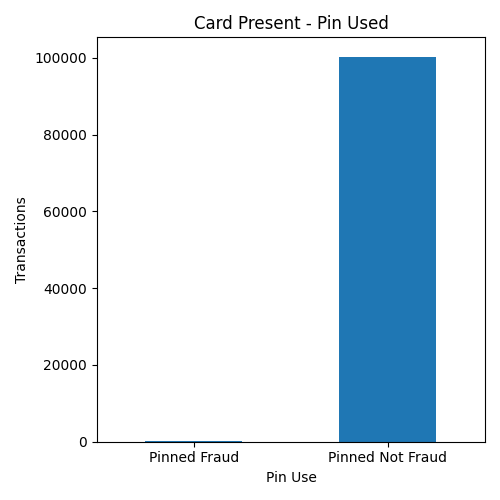

In [12]:
pin_use_plot = grouped_pin_df.plot(kind="bar", figsize=(5,5))
plt.title("Card Present - Pin Used")
plt.ylabel("Transactions")
plt.gca().set_xticklabels(['Pinned Fraud', 'Pinned Not Fraud'])
plt.xticks(rotation=0)
plt.xlabel("Pin Use", rotation=0)
plt.show()
plt.tight_layout()